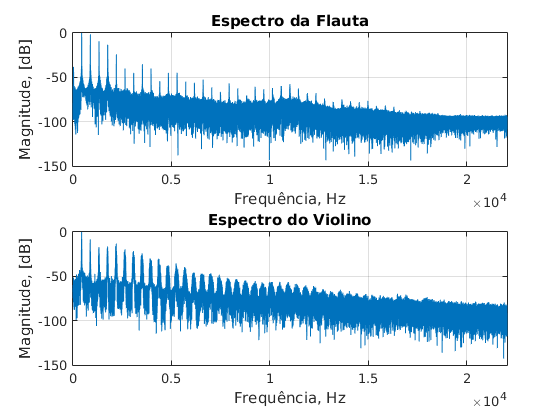

In [5]:
close all;clc;clear all;                     % Limpa variáveis e fecha todos os gráficos
FlautaFile = ['Flauta.wav'];                 % Especifica do local e nome do arquivo de áudio
ViolinoFile = ['Violino.wav'];               % Especifica do local e nome do arquivo de áudio

[vtFlauta,  fs1] = audioread(FlautaFile);    % Abre arquivo de áudio de um arquivo
[vtViolino, fs2] = audioread(ViolinoFile);   % Abre arquivo de áudio de um arquivo

%% FFT
fs=fs1;                      % Frequência de amostragem em kHz

N1=length(vtFlauta);         % Número de amostras
N1=4*N1;                     % Número de pontos da fft

N2=length(vtViolino);        % Número de amostras
N2=4*N2;                     % Número de pontos da fft

f1=(0:N1-1)*fs/N1;           % Definição do eixo da frequência [axis]
f2=(0:N2-1)*fs/N2;           % Definição do eixo da frequência [axis]

Xf=abs(fft(vtFlauta,N1));    % Encontra a magnitude da FFT usando janela retangular (sem janela)
Xv=abs(fft(vtViolino,N2));   % Encontra a magnitude da FFT usando janela retangular (sem janela)
%% Plot
% Flauta
subplot(2,1,1);
plot(f1(1:N1/2),20*log10(Xf(1:N1/2)/max(Xf)));
title('Espectro da Flauta');
grid;
xlabel('Frequência, Hz');
ylabel('Magnitude, [dB]');
axis([f1(1) f1(N1/2) -150 0]);

% Violino
subplot(2,1,2);
plot(f2(1:N2/2),20*log10(Xv(1:N2/2)/max(Xv)));
title('Espectro do Violino');
grid;
xlabel('Frequência, Hz');
ylabel('Magnitude, [dB]');
axis([f2(1) f2(N2/2) -150 0]);


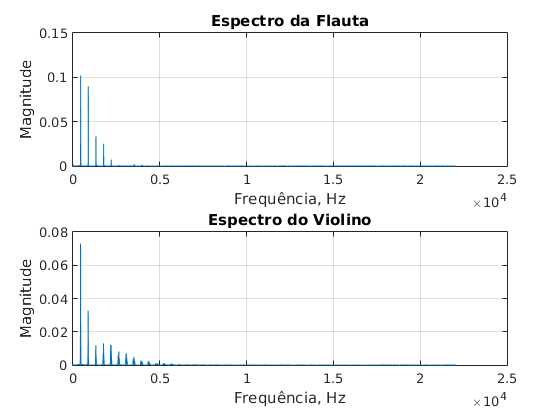

In [4]:
close all;clc;clear all;                     % Limpa variáveis e fecha todos os gráficos
FlautaFile = ['Flauta.wav'];                 % Especifica do local e nome do arquivo de áudio
ViolinoFile = ['Violino.wav'];               % Especifica do local e nome do arquivo de áudio

[vtFlauta,  fs1] = audioread(FlautaFile);    % Abre arquivo de áudio de um arquivo
[vtViolino, fs2] = audioread(ViolinoFile);   % Abre arquivo de áudio de um arquivo

%% FFT

T = 1/fs1;             % Sampling period       
L1 = length(vtFlauta);  % Length of signal
t1 = (0:L1-1)*T;         % Time vector
L2 = length(vtViolino);  % Length of signal
t2 = (0:L2-1)*T;         % Time vector

Y1 = fft(vtFlauta);
Y2 = fft(vtViolino);

%Flauta
Pa1 = abs(Y1/L1);
Pb1 = Pa1(1:L1/2+1);
Pb1(2:end-1) = 2*Pb1(2:end-1);

f1 = fs1*(0:(L1/2))/L1;

%Violino
Pa2 = abs(Y2/L2);
Pb2 = Pa2(1:L2/2+1);
Pb2(2:end-1) = 2*Pb2(2:end-1);

f2 = fs2*(0:(L2/2))/L2;

%Plot
subplot(2,1,1);
plot(f1,Pb1)
title('Espectro da Flauta')
grid;
xlabel('Frequência, Hz')
ylabel('Magnitude')

subplot(2,1,2);
plot(f2,Pb2)
title('Espectro do Violino')
grid;
xlabel('Frequência, Hz')
ylabel('Magnitude')


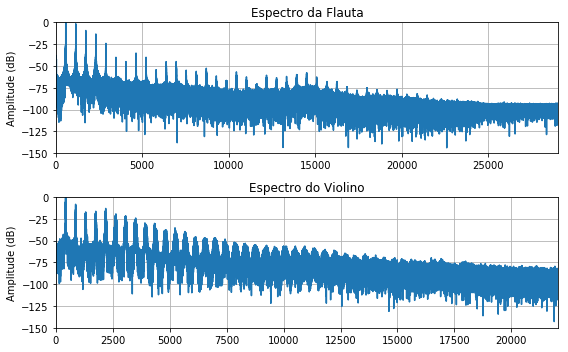

In [2]:
from matplotlib import pyplot as plt 
import numpy as np
import scipy.io.wavfile as wv 

#importando e armazenando o arquivo de áudio numa variável
FlautaFile = wv.read('Flauta.wav')
ViolinoFile = wv.read('Violino.wav')

fs = FlautaFile[0]                      #frequência de amostragem (Hz)

Na  = len(FlautaFile[1])                #número de amostras 
Na1 = 4*Na                              #número de pontos da fft

Nb  = len(ViolinoFile[1])                #número de amostras 
Nb1 = 4*Nb                              #número de pontos da fft

na  = np.arange(0,Na)                   #index n
f  = np.arange(0,Na1)*fs/Na1;           #definição do eixo da frequência
r = np.ones(Na)                         #janela retangular

nb  = np.arange(0,Nb)                   #index n
f  = np.arange(0,Nb1)*fs/Nb1;           #definição do eixo da frequência
r = np.ones(Nb)                         #janela retangular
           
XF = np.fft.fft(FlautaFile[1],Na1)      #fft
XF = np.abs(XF)/Na1                     #normalização

XV = np.fft.fft(ViolinoFile[1],Nb1)      #fft
XV = np.abs(XV)/Nb1                     #normalização
           
plt.figure(1,[8,5])

#Sinal sem janela (retangular)
plt.subplot(211)
plt.plot(f[:Na1//2],20.0*np.log10(XF[:Na1//2]/max(XF)))
plt.axis([f[0],f[Na1//2],-150,0])
plt.grid()
plt.title("Espectro da Flauta")
plt.ylabel("Amplitude (dB)")

plt.subplot(212)
plt.plot(f[:Nb1//2],20.0*np.log10(XV[:Nb1//2]/max(XV)))
plt.axis([f[0],f[Nb1//2],-150,0])
plt.grid()
plt.title("Espectro do Violino")
plt.ylabel("Amplitude (dB)")

plt.tight_layout()
plt.show()